In [53]:
# globa library
from pandas import read_csv, DataFrame, to_datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [54]:
# Dataframe
df_datagen = read_csv('../DataGeneración_filo.csv')

In [55]:
print(df_datagen.head())

                 Fecha        kWh
0  2021-01-01 00:00:00  353483.09
1  2021-01-01 01:00:00  387809.23
2  2021-01-01 02:00:00  385176.88
3  2021-01-01 03:00:00  372592.99
4  2021-01-01 04:00:00  368292.48


In [56]:
df_datagen.index = to_datetime(df_datagen['Fecha'])
del df_datagen['Fecha']


In [57]:
print(df_datagen.head())

                           kWh
Fecha                         
2021-01-01 00:00:00  353483.09
2021-01-01 01:00:00  387809.23
2021-01-01 02:00:00  385176.88
2021-01-01 03:00:00  372592.99
2021-01-01 04:00:00  368292.48


<AxesSubplot:xlabel='Fecha'>

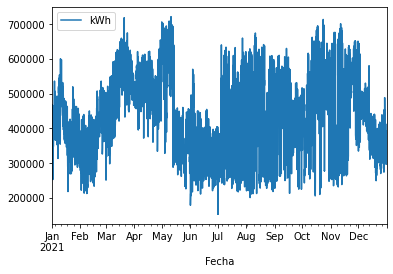

In [58]:
df_datagen.plot()

In [59]:
df_datagen_day = df_datagen.resample("d").mean()

<AxesSubplot:xlabel='Fecha'>

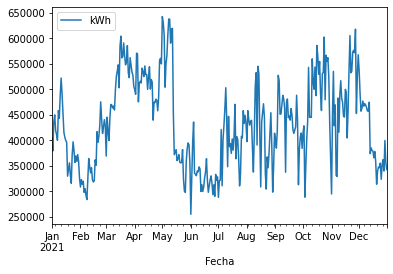

In [60]:
df_datagen_day.plot()

# Stationarity

In [61]:
rolling_mean = df_datagen_day.rolling(7).mean()
rolling_std = df_datagen_day.rolling(7).std()

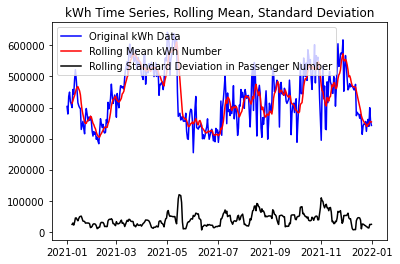

In [62]:
plt.plot(df_datagen_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [63]:
adft = adfuller(df_datagen_day,autolag="AIC")

In [64]:
output_df = DataFrame(
        {"Values":[
            adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )

In [65]:
output_df

,Values,Metric
0,-2.879825,Test Statistics
1,0.047745,p-value
2,4.000000,No. of lags used
3,360.000000,Number of observations used
4,-3.448646,critical value (1%)
5,-2.869602,critical value (5%)
6,-2.571065,critical value (10%)


# Autocorrelation

In [66]:
autocorrelation_lag1 = df_datagen_day['kWh'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)

One Day Lag:  0.8342909421320023


In [67]:
day=3
autocorrelation_lag9 = df_datagen_day['kWh'].autocorr(lag=day)
print(f"{day} Day Lag: ", autocorrelation_lag9)

3 Day Lag:  0.6968223579754944


# Decomposition

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose